In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2   
    d_loss = 2*(y_pred - y)
    
    return y_pred, loss, d_loss

In [3]:
def optimize_perceptron(x, y, learning_rate):
    """
    Optimizes the Perceptron's weights by looping over the same steps for as many epochs as the user wants.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    
    It is worth noting that a history of the Perceptron's losses over each epoch is kept,
    which will be used
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()
    
    errors = list()
    epochs = list()
    
    # Loop until stop conditions are met
    while (epoch <= 1000) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = backpropagation(x[i], d_loss)
            
            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

In [4]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    For the purpose of this project, the activation function maps the negative outputs
    to 0 and the positive ones to 1
    """
    if prediction >= 0:
        return 1
    return 0
  

def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x), by applying the Perceptron's 
    function, and the activation function lastly.
    As both weights and x are vectors, the dot product is used.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)
    
    return prediction

In [5]:
def backpropagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates   

In [6]:

data = pd.read_csv('data_mnist.csv')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))


# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.
print('Values after rescaling: ', np.unique(x_train))

(8816, 785)
[0 1]
(6612, 784)
(2204, 784)
(6612,)
(2204,)
Values before rescaling:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225

In [7]:
def calculate_accuracy(x_test, y_test, weights, bias):
    
    # Initialize True Positive, True Negative, False Positive and False Negative
    tp, tn, fp, fn = 0, 0, 0, 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, weights, bias)

        if prediction == label:
            if prediction == 1:
                tp += 1
            else:
                tn += 1
        else:
            if prediction == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn)/(tp + tn + fp + fn)
    return accuracy

In [8]:
weights, bias, errors = optimize_perceptron(x_train, y_train, learning_rate=0.001)

Epoch 1. loss: 0.012401693889897156
Epoch 2. loss: 0.008318209316394435
Epoch 3. loss: 0.006503327283726558
Epoch 4. loss: 0.0054446460980036296
Epoch 5. loss: 0.004688445251058681
Epoch 6. loss: 0.0043859649122807015
Epoch 7. loss: 0.003932244404113733
Epoch 8. loss: 0.003176043557168784
Epoch 9. loss: 0.0024198427102238356
Epoch 10. loss: 0.002268602540834846
Epoch 11. loss: 0.0024198427102238356
Epoch 12. loss: 0.002117362371445856
Epoch 13. loss: 0.0019661222020568663
Epoch 14. loss: 0.002117362371445856
Epoch 15. loss: 0.0018148820326678765
Epoch 16. loss: 0.0019661222020568663
Epoch 17. loss: 0.0019661222020568663
Epoch 18. loss: 0.0018148820326678765
Epoch 19. loss: 0.0019661222020568663
Epoch 20. loss: 0.001663641863278887
Epoch 21. loss: 0.002117362371445856
Epoch 22. loss: 0.002117362371445856
Epoch 23. loss: 0.0018148820326678765
Epoch 24. loss: 0.0015124016938898972
Epoch 25. loss: 0.0018148820326678765
Epoch 26. loss: 0.001058681185722928
Epoch 27. loss: 0.0016636418632788

In [9]:
acc = calculate_accuracy(x_test, y_test, weights, bias)
print('Accuracy: ', acc)

Accuracy:  0.9972776769509982


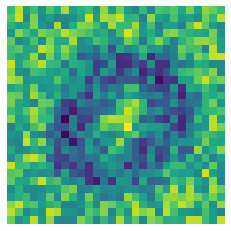

In [10]:
weights.resize((28, 28))
plt.imshow(weights)
plt.axis('off')
plt.show()